Compare sample means for different sample sizes. Then, explain how the distribution of these sample means change as the sample size changes and how the mean and standard deviation of the distributions change as well. Compose your explanation as an email to a fellow co-worker explaining to them what the sample size changes (and the subsequent changes in mean and standard deviation) mean for data analysis.

--- 

Hi all,

As it pertains to yesterday's meeting, I wanted to explain why we need to dedicate more resources to expanding the volume of our data collection.

With a smaller dataset, we are less certain that we're getting the right statistics. Say we want to find the average baseball player salary. If we have a dataset of 5 people, the average salary probably won't be the same as a dataset with 100 people.

![](img1.png)
![](img2.png)

We can tabulate that difference by doing that -- hundreds of times. I sampled 5 players' salaries 100 times and made a histogram of the different means I got. Same with 100 samples instead, and you can see that the 100 samples has more 'resolution': the shape looks more like a bell curve (what we expect) and it's way, way less wide.

We call that 'resolution' the standard deviation (STD).

And, in fact, if we extrapolate this to a large number of entries, the STD gets better and better (smaller). I did this with the whole example dataset and made this graph, showing how the mean starts to converge to a 'right answer' as the STD is minimized.
![](img3.png)

# The Central Limit Theorem

The *Central Limit Theorem* states that if we draw a simple random sample of size $n$ from any population with mean $\mu$ and standard deviation $\sigma$, if $n$ is large the distribuion of the sample means is approximately normal of the form

$$N(\mu, \frac{\sigma}{n})$$

This activity is meant to offer an example of the central limit theorem in action, and the effect of using different sample sizes in forming the distribution of sample means. 

### Baseball Salaries

![](images/baseballs.png)


The dataset below represents Major League Baseball player salaries from the year 2020, and was gathered from USA Today's databases. Below, the dataset is loaded and we examine the features and datatypes. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#read in the data
baseball_salaries = pd.read_csv('data/baseball.csv', index_col=0)

In [3]:
#Examine the .info()
baseball_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 1 to 797
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   team         797 non-null    object
 1   leagueID     797 non-null    object
 2   player       797 non-null    object
 3   salary       797 non-null    int64 
 4   position     797 non-null    object
 5   gamesplayed  797 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 43.6+ KB


In [4]:
#First few rows
baseball_salaries.head()

,team,leagueID,player,salary,position,gamesplayed
1,ANA,AL,anderga0,6200000,CF,112
2,ANA,AL,colonba0,11000000,P,3
3,ANA,AL,davanje0,375000,CF,108
4,ANA,AL,donnebr0,375000,P,5
5,ANA,AL,eckstda0,2150000,SS,142


### Task

Our goal is to take samples from the salary data and build a distribution of these sample means.  To begin, draw a histogram of the salaries.  Note the skew and lack of normality in this distribution.    

''

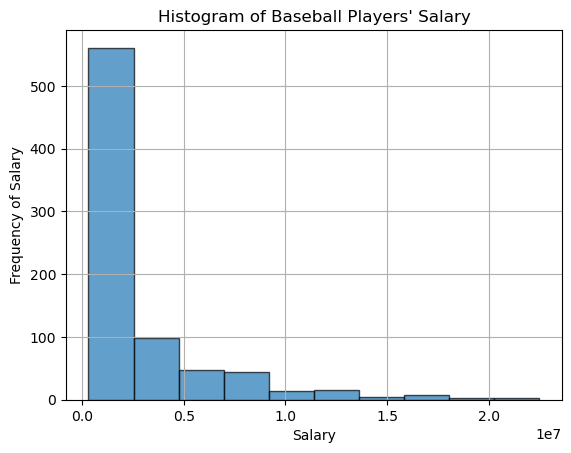

In [19]:
fig, ax = plt.subplots()

ax.hist( baseball_salaries['salary'], edgecolor='black', alpha=.7)#, bins=20)

#ax.set_yscale('log')

ax.grid()
ax.set_xlabel('Salary')
ax.set_ylabel('Frequency of Salary')
ax.set_title('Histogram of Baseball Players\' Salary')
''

### Taking Samples

Pandas DataFrame's have built in methods for taking random samples with replacement.  The `.sample()` method is demonstrated below.

In [7]:
baseball_salaries['salary'].sample(4)

691      450000
676     2125000
747      335000
150    14000000
Name: salary, dtype: int64

### Sample Means

Now, use this method to repeatedly take samples and build a list of sample means.  As a starting place let us take 1000 samples of size 5 and draw the histogram of the sample means.  What is the mean and standard deviation? 

In [27]:
#empty list for sample means

def retrieve_sample_means(sample_size:int=5)-> list:
    sample_means = []

    for n in range(1000):
        sample_means.append( baseball_salaries['salary'].sample(sample_size).mean() )
    return sample_means

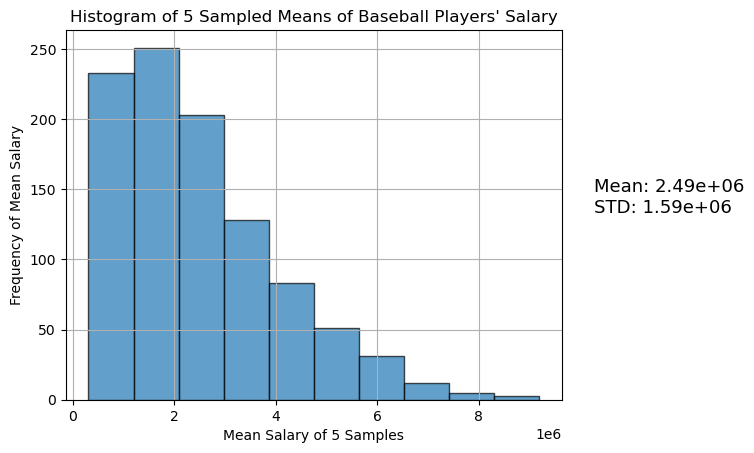

In [93]:
#histogram of sample means
def create_histogram(sample_size:int, returnfig = True)->fig:

    sample_means = retrieve_sample_means(sample_size = sample_size)
    
    mean = np.mean(sample_means)
    std = np.std(sample_means)
    
    if returnfig is True:
        fig, ax = plt.subplots()
        
        ax.hist(sample_means, edgecolor='black', alpha=.7)

        ax.grid()
        ax.set_xlabel('Mean Salary of %s Samples'%sample_size)
        ax.set_ylabel('Frequency of Mean Salary')
        ax.set_title('Histogram of %s Sampled Means of Baseball Players\' Salary'%sample_size)

        plt.figtext(.95, .5, 'Mean: %.2e\nSTD: %.2e'%( mean, std ), ha='left', size=13) 

        return fig, mean, std
    else:
        return None, mean, std

fig5,_,_ = create_histogram(sample_size = 5)

Repeat the above exercise with samples of size:

- 10
- 25
- 50
- 100

Your discussion post should explain how the distribution of these sample means changes as the sample size changes, and how the mean and standard deviation of the distributions change.

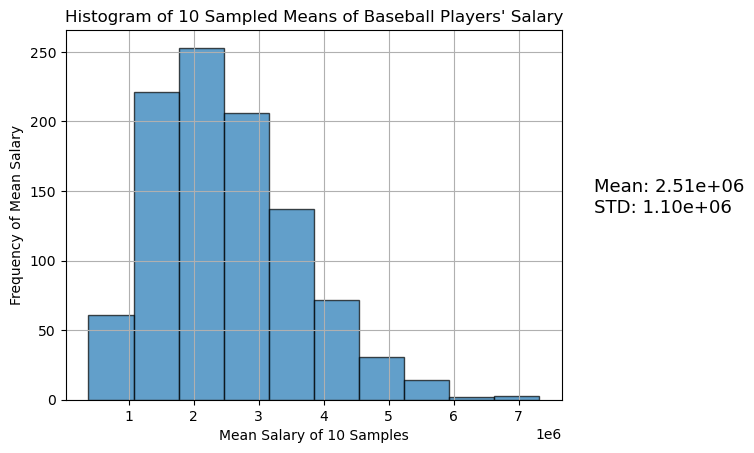

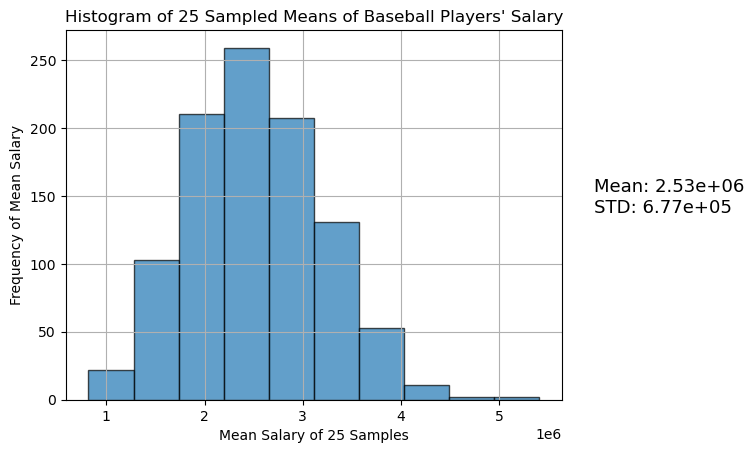

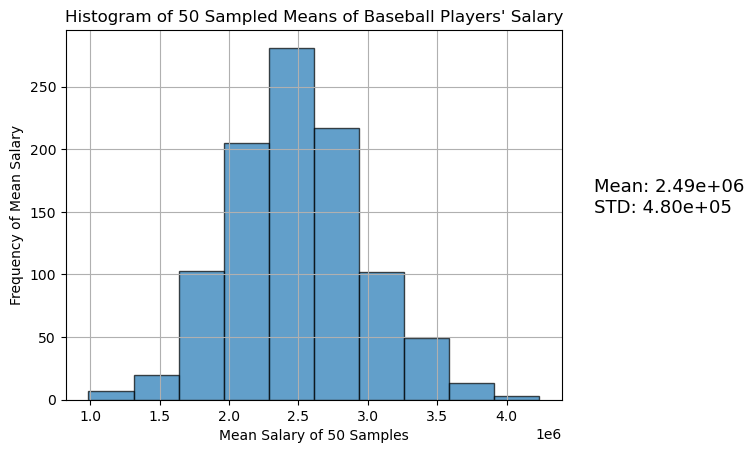

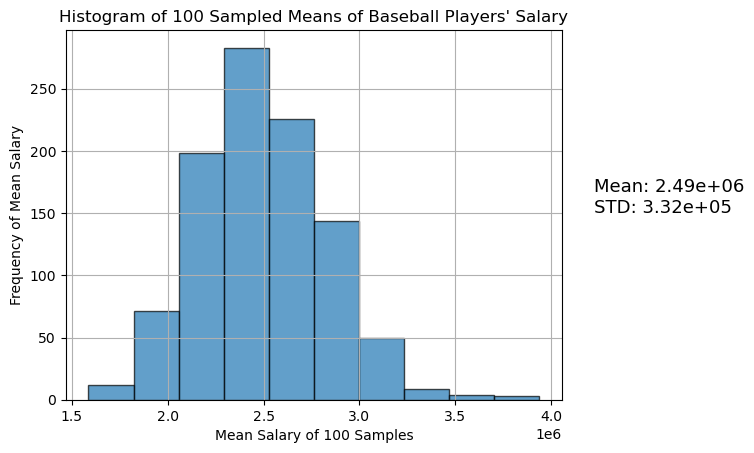

In [94]:
fig10,_,_ = create_histogram(sample_size = 10)
fig25,_,_ = create_histogram(sample_size = 25)
fig50,_,_ = create_histogram(sample_size = 50)
fig100,_,_ = create_histogram(sample_size = 100)


For the sake of making it interesting:

In [110]:
samples = np.linspace(1,len(baseball_salaries['salary']),len(baseball_salaries['salary']))

mean = []
std = []
for n in samples:
    _,m,s = create_histogram(sample_size = int(n), returnfig = False)
    mean.append(m)
    std.append(s)

''

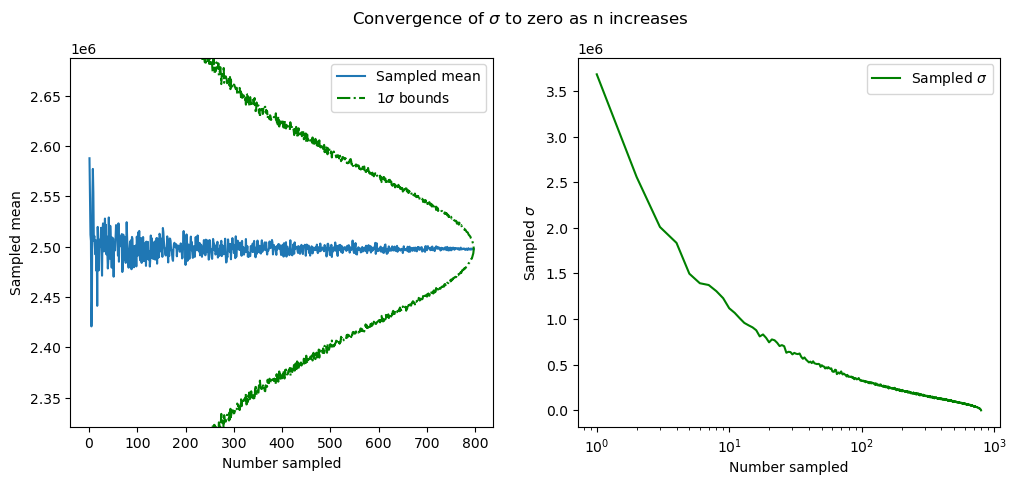

In [136]:
fig, ax = plt.subplots(1,2)
fig.set_figwidth(12)

ax[0].plot(samples, mean, label = 'Sampled mean')
ax[1].plot(samples, std, label = f'Sampled $\sigma$', color = 'green')

ax[1].set_xscale('log')

convergence = baseball_salaries['salary'].mean()
ax[0].plot(samples, convergence + np.array(std), '-.', color = 'green')
ax[0].plot(samples, convergence - np.array(std), '-.', color = 'green', label = f'1$\sigma$ bounds')

ax[0].set_ylim(min(mean) - 1e5, max(mean)+1e5)

ax[0].legend()
ax[1].legend()

ax[0].set_ylabel('Sampled mean')
ax[0].set_xlabel('Number sampled')

ax[1].set_ylabel(f'Sampled $\sigma$')
ax[1].set_xlabel('Number sampled')

fig.suptitle(f'Convergence of $\sigma$ to zero as n increases')

''